### Problem 1:
Set of three sites: S = $\{s_1=(-3,-1), s_2=(1,1), s_3=(-2,2)\} \subset \mathbb{R}^2 \\$
Five data points: X = $\{x_1=(-2,0), x_2=(-2,1), x_3=(-1,1), x_4=(0,0), x_5=(-3,-2)\}$

In [20]:
import numpy as np 
import matplotlib.pyplot as plt

In [21]:
S = np.array([[-3,-1],[1,1],[-2,3]])
X = np.array([[-2,0],[-2,1],[-1,1],[0,0],[-3,-2]])

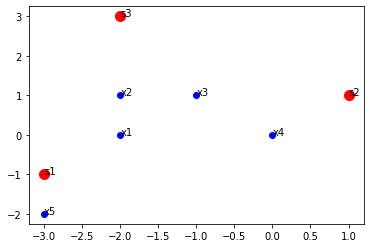

In [22]:

for i in range(0,X.shape[0]):
    plt.scatter(X[i][0], X[i][1], color='blue')
    plt.text(X[i][0], X[i][1], 'x{}'.format(i+1))
for i in range (0,S.shape[0]):
    plt.scatter(S[i][0],S[i][1], color='red',s=100)
    plt.text(S[i][0],S[i][1], 's{}'.format(i+1))

plt.show()

$f_i(alph_0,alph_1,alph_2,alph_3) = (y_i - (alph_0+alph_1 x_{i,1} + alph_2 x_{i,2} + alph_3 x_{i,3}))^2$

$f_i(alph_0,alph_1,alph_2,alph_3) = -2 (y_i - (alph_0+alph_1 x_{i1} + alph_2 x_{i2}+ alph_3 x_{i3})) [1 x_{i1} x_{i2} x_{i3}]^T $

In [23]:
def assignSite(xi, S):
    s1 = S[0]
    s_star = s1
    for i in range(S.shape[0]):
        newDistance = S[i] - xi
        normNewDistance = newDistance[0]**2 + newDistance[1]**2
        starDistance = s_star - xi
        normStarDistance = starDistance[0]**2 + starDistance[1]**2
        if normNewDistance < normStarDistance:
            s_star = S[i]

    return s_star

### a). - e).
Computing closest sites for each $x_i$ udner euclidean distance:

In [24]:
assignments = {}
for i in range(0,X.shape[0]):
    s_star = assignSite(X[i], S)
    assignments['x{}'.format(i+1)] = s_star

print(assignments)

{'x1': array([-3, -1]), 'x2': array([-2,  3]), 'x3': array([1, 1]), 'x4': array([1, 1]), 'x5': array([-3, -1])}


f). Probabilty density function - liklihood fj(x) for each Guassian $\\$

$f_1(x) = \frac{1}{2\pi\sigma_1}exp(\frac{-1}{2\sigma_1^2}(|| x - \mu_1 ||^2))\\ $
$f_2(x) = \frac{1}{2\pi\sigma_2}exp(\frac{-1}{2\sigma_2^2}(|| x - \mu_2 ||^2))\\ $
$f_3(x) = \frac{1}{2\pi\sigma_3}exp(\frac{-1}{2\sigma_3^2}(|| x - \mu_3 ||^2))\\ $

$ w_j(x) = \frac{f_j(x)}{\sum\limits_{k=1}^{3}(f_j(x))} $

In [25]:
def liklihood(x, mue, sigma):
    ''' x and mue are both vectors. sigma is a scalar. '''
    distance = x - mue
    distanceSquared = distance[0]**2 + distance[1]**2
    return (1/(2*np.pi*sigma)) * np.exp(-(1/(2*sigma))*distanceSquared)

### g). - k).
Soft assignment:

In [26]:
sigmas = np.array([np.sqrt(0.3), np.sqrt(1.0), np.sqrt(1.0)])
k = S.shape[0]
n = X.shape[0]
W = np.empty((n,k))
for i in range(0,n):
    for j in range(0,k):
        numerator = liklihood(X[i], S[j], sigmas[j])
        denom = 0
        for l in range(0,k):
            denom += liklihood(X[i], S[l], sigmas[l])
        W[i][j] = numerator/denom
for i in range(0,len(W)):
    print(f"w_{i+1} = {W[i]}")

w_1 = [0.94279284 0.02159803 0.03560913]
w_2 = [0.1149387  0.06713914 0.81792216]
w_3 = [0.00562408 0.61895857 0.37541735]
w_4 = [5.36020851e-04 9.95396023e-01 4.06795604e-03]
w_5 = [9.99991830e-01 5.08546726e-06 3.08449181e-06]
